<a href="https://colab.research.google.com/github/caltunay/dd_competition_eq_damage_prediction/blob/master/Competition_EQ_Take_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
path_train_labels = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/train_labels.csv'
path_train_values = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/train_values.csv' 
path_test_values = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/test_values.csv'

train_labels = pd.read_csv(path_train_labels)
train_values = pd.read_csv(path_train_values)
test_values = pd.read_csv(path_test_values)

In [0]:
drop = ['geo_level_2_id', 'geo_level_3_id']

train_values.drop(labels = drop, axis = 1, inplace = True)
test_values.drop(labels = drop, axis = 1, inplace = True)

In [0]:
all = pd.merge(left = train_values, right = train_labels, on = 'building_id', how = 'inner')

In [0]:
series, bins = pd.qcut(x = all['geo_level_1_id'], q = 6, retbins = True, labels = ['freq1', 'freq2', 'freq3', 'freq4', 'freq5','freq6'])
series.rename('geo_level_freq', inplace = True)

In [0]:
all = pd.concat([all, series], axis = 1)
all.head()

,building_id,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,geo_level_freq
0,802906,6,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq1
1,28830,8,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,freq2
2,94947,21,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq5
3,590882,22,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,freq5
4,201944,11,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq3


In [0]:
all.drop(labels = 'geo_level_1_id', axis = 1, inplace = True)

In [0]:
all.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,geo_level_freq
0,802906,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq1
1,28830,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,freq2
2,94947,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq5
3,590882,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,freq5
4,201944,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq3


In [0]:
type_list = []

for col in train_values.columns.values.tolist():

    if train_values[col].dtype == 'object' or :
        type_list.append(col)# type_list + col
    else:
        pass

In [0]:
type_list.append('geo_level_freq')

In [0]:
type_list

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status',
 'geo_level_freq']

In [0]:
all = pd.get_dummies(data = all, prefix_sep = '|',   columns = type_list, drop_first = True)
all.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6
0,802906,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,28830,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,94947,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,590882,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,201944,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [0]:
all['damage_grade'].value_counts(normalize = True)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

In [0]:
class2, class3, class1 = all['damage_grade'].value_counts()

In [0]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
df_class1 = all[all['damage_grade'] == 1]
df_class2 = all[all['damage_grade'] == 2]
df_class3 = all[all['damage_grade'] == 3]

In [0]:
df_class2_undersampled = df_class2.sample(n = class1)
df_class3_undersampled = df_class3.sample(n = class1)

In [0]:
undersampled_df = pd.concat([df_class1, df_class2_undersampled, df_class3_undersampled], axis = 0, ignore_index = True)
undersampled_df.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6
0,475515,2,0,8,6,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,989500,1,0,13,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,864809,2,0,9,8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,440102,1,5,11,3,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,402996,1,0,15,3,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


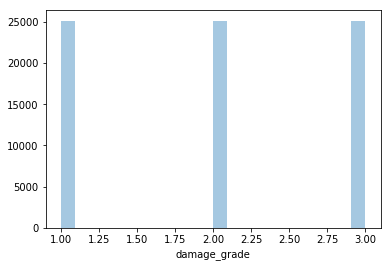

In [0]:
sns.distplot(undersampled_df['damage_grade'], kde = False)

In [0]:
undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75372 entries, 0 to 75371
Data columns (total 64 columns):
building_id                               75372 non-null int64
count_floors_pre_eq                       75372 non-null int64
age                                       75372 non-null int64
area_percentage                           75372 non-null int64
height_percentage                         75372 non-null int64
has_superstructure_adobe_mud              75372 non-null int64
has_superstructure_mud_mortar_stone       75372 non-null int64
has_superstructure_stone_flag             75372 non-null int64
has_superstructure_cement_mortar_stone    75372 non-null int64
has_superstructure_mud_mortar_brick       75372 non-null int64
has_superstructure_cement_mortar_brick    75372 non-null int64
has_superstructure_timber                 75372 non-null int64
has_superstructure_bamboo                 75372 non-null int64
has_superstructure_rc_non_engineered      75372 non-null int64
has_super

In [0]:
undersampled_df.nunique().sort_values(ascending = False) 

to_scale = 'area_percentage age height_percentage count_families count_floors_pre_eq'.split()

remaining_df = undersampled_df.drop(labels = to_scale, axis = 1)
to_scale_df = undersampled_df[to_scale]

In [0]:
undersampled_df2 = undersampled_df.copy()
# undersampled_df['area_percentage'] = np.log(undersampled_df['area_percentage'])
# undersampled_df['age'] = np.log(undersampled_df['age'])
# undersampled_df['height_percentage'] = np.log(undersampled_df['height_percentage']) 
# undersampled_df['count_families'] = np.log(undersampled_df['count_families'])
# undersampled_df['count_floors_pre_eq'] = np.log(undersampled_df['count_floors_pre_eq'])

In [0]:
undersampled_df2['area_percentage'] = np.log(undersampled_df['area_percentage'] + 1)
undersampled_df2['age'] = np.log(undersampled_df['age'] + 1)
undersampled_df2['height_percentage'] = np.log(undersampled_df['height_percentage'] + 1) 
undersampled_df2['count_families'] = np.log(undersampled_df['count_families'] + 1)
undersampled_df2['count_floors_pre_eq'] = np.log(undersampled_df['count_floors_pre_eq'] + 1)

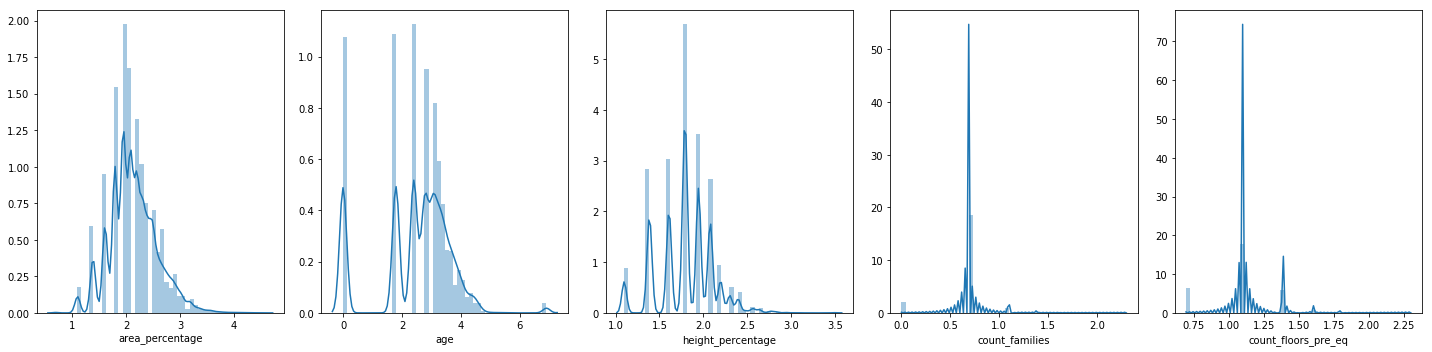

In [0]:
n=1
plt.figure(figsize = (20,5))
for i in to_scale:
    plt.subplot(1,5,n)
    sns.distplot(undersampled_df2[i])
    n+=1
plt.tight_layout()
plt.show()

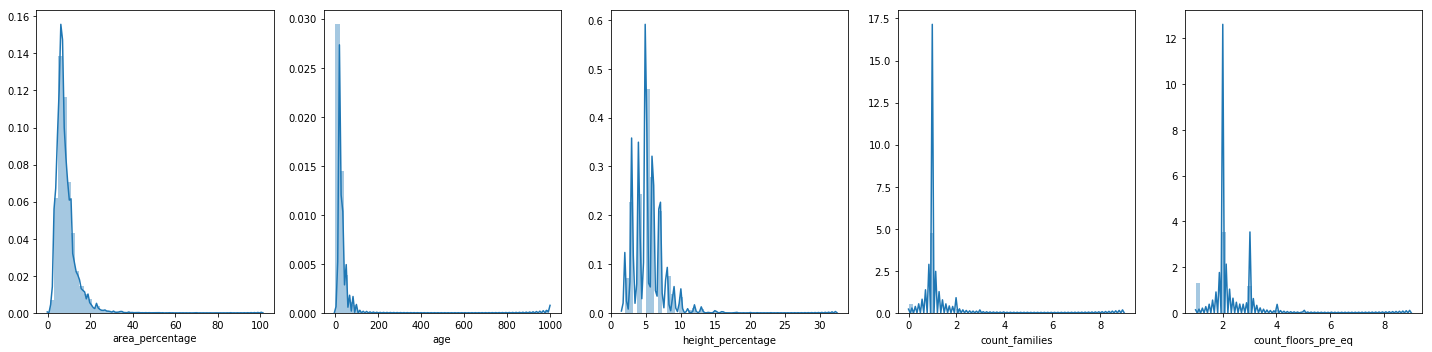

In [0]:
n=1
plt.figure(figsize = (20,5))
for i in to_scale:
    plt.subplot(1,5,n)
    sns.distplot(undersampled_df[i])
    n+=1
plt.tight_layout()
plt.show()

In [0]:
to_scale = 'area_percentage age height_percentage count_families count_floors_pre_eq'.split()

remaining_df2 = undersampled_df2.drop(labels = to_scale, axis = 1)
to_scale_df2 = undersampled_df2[to_scale]

temp_x2 = to_scale_df2.values

from sklearn.preprocessing import StandardScaler
ssx2 = StandardScaler()

scaled_x2 = ssx2.fit_transform(temp_x2)
scaled_df2 = pd.DataFrame(scaled_x2, columns = to_scale)

df_clean2 = pd.concat([remaining_df2,scaled_df2], axis = 1)
df_clean2.head()


# x2 = df_clean.drop(labels = ['building_id', 'damage_grade'], axis = 1).values
# y2 = pd.get_dummies(data = df_clean[['damage_grade']], prefix_sep = '|', columns = ['damage_grade']).values

NameError: ignored

In [0]:
x2 = df_clean2.drop(labels = ['building_id', 'damage_grade'], axis = 1).values
y2 = pd.get_dummies(data = df_clean2[['damage_grade']], prefix_sep = '|', columns = ['damage_grade']).values

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
x2.shape

(75372, 62)

In [0]:
input_dim = x2.shape[1]

model = Sequential()
model.add(Dense(64, input_dim = input_dim , activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(Dropout()))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' ,    optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(x2, y2, epochs = 100, batch_size = 10500)

Epoch 1/100
75372/75372 [==============================] - 2s 26us/step - loss: 1.0918 - acc: 0.4025
Epoch 2/100
75372/75372 [==============================] - 0s 4us/step - loss: 1.0663 - acc: 0.4792
Epoch 3/100
75372/75372 [==============================] - 0s 4us/step - loss: 1.0252 - acc: 0.4848
Epoch 4/100
75372/75372 [==============================] - 0s 4us/step - loss: 0.9764 - acc: 0.4885
Epoch 5/100
75372/75372 [==============================] - 0s 4us/step - loss: 0.9374 - acc: 0.4943
Epoch 6/100
75372/75372 [==============================] - 0s 4us/step - loss: 0.9103 - acc: 0.5074
Epoch 7/100
75372/75372 [==============================] - 0s 4us/step - loss: 0.8887 - acc: 0.5349
Epoch 8/100
75372/75372 [==============================] - 0s 4us/step - loss: 0.8695 - acc: 0.5585
Epoch 9/100
75372/75372 [==============================] - 0s 4us/step - loss: 0.8545 - acc: 0.5750
Epoch 10/100
75372/75372 [==============================] - 0s 4us/step - loss: 0.8448 - acc: 0.580

KeyboardInterrupt: ignored

In [0]:
from sklearn.preprocessing import StandardScaler

temp_x = to_scale_df.values


In [0]:
ssx = StandardScaler()
scaled_x = ssx.fit_transform(temp_x)
scaled_df = pd.DataFrame(scaled_x, columns = to_scale)
scaled_df.head()

,area_percentage,age,height_percentage,count_families,count_floors_pre_eq
0,-0.079421,-0.321248,0.303658,0.072990,-0.077204
1,0.921934,-0.321248,-0.646456,0.072990,-1.383386
2,0.120850,-0.321248,1.253772,0.072990,-0.077204
3,0.521392,-0.254213,-1.121513,2.350048,-1.383386
4,1.322476,-0.321248,-1.121513,0.072990,-1.383386


In [0]:
df_clean = pd.concat([remaining_df,scaled_df], axis = 1)

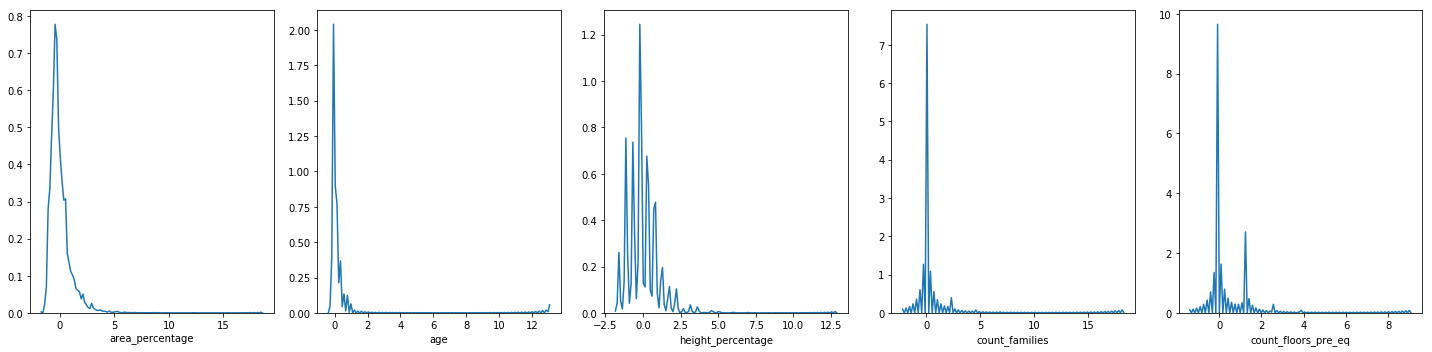

In [0]:
templist = 'area_percentage	age	height_percentage	count_families	count_floors_pre_eq'.split()

n = 1
plt.figure(figsize = (20, 5))

for i in templist:

    plt.subplot(1,5,n)
    sns.distplot(df_clean[i], hist = False)
    n+=1
    
plt.tight_layout()
plt.show()



In [0]:
x = df_clean.drop(labels = ['building_id', 'damage_grade'], axis = 1).values
y = pd.get_dummies(data = df_clean[['damage_grade']], prefix_sep = '|', columns = ['damage_grade']).values

In [0]:
# pd.get_dummies(data = df_clean[['damage_grade']], prefix_sep = '|', columns = ['damage_grade']).values

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# from keras.utils import np_utils
# # y_train_onehot = np_utils.to_categorical(y_train)
# y_test_onehot = np_utils.to_categorical()

(75372,)

In [0]:
input_dim = x.shape[1]

model = Sequential()
model.add(Dense(32, input_dim = input_dim , activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' ,    optimizer = 'adam' , metrics = ['accuracy'] )
model.compile()
model.fit(x, y, epochs = 300, batch_size = 22500)

Epoch 1/300
75372/75372 [==============================] - 1s 17us/step - loss: 1.0779 - acc: 0.3996
Epoch 2/300
75372/75372 [==============================] - 0s 3us/step - loss: 1.0573 - acc: 0.4426
Epoch 3/300
75372/75372 [==============================] - 0s 3us/step - loss: 1.0336 - acc: 0.4769
Epoch 4/300
75372/75372 [==============================] - 0s 4us/step - loss: 1.0064 - acc: 0.5054
Epoch 5/300
75372/75372 [==============================] - 0s 3us/step - loss: 0.9795 - acc: 0.5194
Epoch 6/300
75372/75372 [==============================] - 0s 3us/step - loss: 0.9558 - acc: 0.5270
Epoch 7/300
75372/75372 [==============================] - 0s 3us/step - loss: 0.9358 - acc: 0.5319
Epoch 8/300
75372/75372 [==============================] - 0s 3us/step - loss: 0.9189 - acc: 0.5360
Epoch 9/300
75372/75372 [==============================] - 0s 3us/step - loss: 0.9056 - acc: 0.5393
Epoch 10/300
75372/75372 [==============================] - 0s 3us/step - loss: 0.8946 - acc: 0.545

KeyboardInterrupt: ignored

In [0]:
# model = Sequential()
# model.add(Dense(32, input_dim = 62 , activation = 'relu'))
# model.add(Dense(24, activation = 'relu'))
# model.add(Dense(16, activation = 'relu'))
# # model.add(Dense(10, activation = 'relu'))
# model.add(Dense(3, activation = 'softmax'))

W0811 08:52:51.022165 140293950019456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 08:52:51.037870 140293950019456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

W0811 08:53:05.061474 140293950019456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 08:53:05.101001 140293950019456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.fit(x, y, epochs = 200, batch_size = 5000 )

ValueError: ignored